# June 4, 2019
## imdb
### 2018020143 민정원

## 1. 필요한 모듈 불러오기

In [1]:
# TensorFlow and tf.keras
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

## 2. 데이터 받기

In [2]:
vocab_size = 10000

(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.imdb.load_data(num_words=vocab_size)

word2idx = tensorflow.keras.datasets.imdb.get_word_index()

### 2.1 데이터 ᄁᆃᆯ 확인

In [4]:
print(x_train.shape)
print(x_test.shape)
print(x_train.ndim)
print(x_test.ndim)
print(y_train.shape)
print(y_test.shape)
print(y_train.ndim)
print(y_test.ndim)

(25000,)
(25000,)
1
1
(25000,)
(25000,)
1
1


### 2.2 미리보기

In [10]:
len(x_train[0])

218

In [11]:
len(x_train[9])

130

In [12]:
y_train[0]

1

In [13]:
y_train[9]

0

In [14]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

### 2.3 x_train에 등장하는 값 중 가장 큰 값 찾기

In [16]:
for sequence in x_train:
    print(sequence)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[1, 488, 2, 47, 69, 6, 2375, 196, 611, 21, 47, 1238, 171, 898, 8, 27, 403, 587, 49, 147, 2, 141, 17, 4, 1960, 1043, 325, 2006, 4, 251, 4, 3108, 385, 46, 2, 190, 9, 6, 2468, 3056, 34, 2, 39, 4, 297, 34, 2, 45, 6, 1731, 7700, 7, 4, 356, 1521, 5, 1033, 93, 94, 86, 699, 1267, 11, 111, 153, 11, 4, 2351, 1630, 7558, 4, 2, 1308, 4, 22, 9, 324, 23, 35, 1711, 2407, 21, 9, 6486, 24, 6, 2, 22, 19, 4, 4268, 2611, 23, 4, 606, 65, 11, 2, 8, 4, 6183, 711, 2, 2, 2, 9, 4799, 8, 3552, 27, 577, 2, 2, 2, 76, 8, 4, 2, 7, 1652, 2, 6534, 2, 2, 5, 2, 26, 199, 1339, 21, 12, 9, 4, 1380, 2, 37, 961, 4, 91, 221, 791, 8, 4, 268, 2, 4, 3093, 7, 1548, 19, 4, 2, 6733, 15, 59, 9, 4, 2, 11, 6, 993, 500, 2303, 1178, 18, 451, 7, 1966, 438]
[1, 4, 204, 8134, 16, 6, 710, 21, 441, 2467, 1179, 509, 12, 16, 34, 57, 817, 6, 87, 22, 21, 253, 11, 4, 208, 2122, 7, 330, 4, 840, 2, 11, 14, 201, 994, 7, 4, 8134, 23, 4, 85, 508, 9, 331, 2526, 12, 3202, 7, 107, 183, 4633, 706, 5, 5930, 162, 929, 4129, 4303, 7, 5715, 1801, 39, 4, 86, 2

[1, 25, 124, 335, 11, 1113, 54, 4, 22, 129, 149, 47, 1942, 4752, 2818, 1228, 12, 817, 15, 36, 805, 5, 2, 8, 2421, 4, 2803, 11, 998, 2, 141, 6, 2803, 9, 4, 1224, 1692, 63, 47, 1542, 275, 2818, 10, 10, 94, 44, 49, 1165, 1003, 1372, 1187, 15, 9, 1408, 8, 30, 502, 8, 361, 6, 1222, 8, 332, 84, 21, 305, 12, 3044, 84, 8, 516, 257, 85, 42, 533, 42, 142, 40, 15, 94, 1061, 19, 503, 651, 248, 156, 1266, 11, 2, 673, 19, 8815, 2, 269, 8, 511, 6, 229, 15, 166, 220, 57, 281, 10, 10, 94, 6, 2803, 7, 4, 2, 243, 798, 12]
[1, 733, 203, 3031, 49, 1028, 637, 97, 14, 733, 346, 5, 1047, 13, 1247, 14, 20, 39, 118, 818, 88, 12, 2774, 928, 5, 69, 49, 350, 156, 11, 12, 40, 1842, 5131, 5, 2021, 2831, 89, 78, 100, 12, 30, 208, 73, 45, 184, 78, 4878, 6134, 299, 2, 6, 3801, 3944, 37, 5905, 638, 6, 420, 15, 203, 485, 8, 3408, 1788, 33, 2, 568, 1147, 8728, 646, 1468, 9, 7031, 6, 1002, 746, 4, 1147, 23, 6, 318, 1147, 768, 446, 1209, 1479, 6, 830, 86, 3639, 4779, 6921, 240, 9663, 19, 35, 23, 4, 1289, 78, 1002, 773, 2, 5

In [23]:
for sequence in x_train:
    print(max(sequence))

7486
9837
6905
9941
7224
7982
9363
9820
7612
8419
8914
7412
9667
9106
6640
9671
9263
9935
8742
9580
9859
8793
7609
9462
9075
8614
8887
5898
9637
9212
9771
9209
8257
7778
9877
9753
7015
9902
8427
8867
8406
9579
9529
7056
7023
9922
5811
9124
9910
8795
7799
7146
9978
7999
9565
9731
9095
9888
5247
9655
4852
9939
9018
9885
7239
9636
9389
9561
9673
9147
9956
9448
8520
9360
9765
9025
9928
8352
9960
7320
8318
7881
9715
9851
9266
9055
8894
9719
9271
7311
8791
9918
9486
9867
9283
7707
9133
9055
9978
8013
8448
8700
9906
7517
9962
6266
6903
9815
9976
9273
9413
8931
8631
9685
9419
9964
7361
9052
9482
9643
9865
9819
7181
2775
9709
9977
8916
4431
9700
6532
8836
9926
6781
7614
5418
8881
9841
9615
9072
9831
6891
8827
9019
9583
8776
8534
9853
8368
8931
9830
8084
5991
7901
9671
6817
9937
7960
7676
8653
6866
6325
9737
9771
5636
8557
7371
9995
8689
9294
8893
8462
6975
9665
8802
7608
9933
9738
9418
7542
7073
8448
9570
9916
9315
7806
9901
9388
9723
9049
9985
8427
8376
9985
9584
9426
9840
9208
8648
9675
9608


9690
5967
8075
9979
8231
9767
8130
6965
8910
7567
9392
9108
9774
9191
9816
9307
8596
9999
4814
9418
9812
9091
6475
8791
9831
8895
9941
9474
8087
9196
9681
7691
9527
9913
9474
9973
9884
8707
7612
9741
9835
7110
9781
8848
9611
6257
7335
8255
9916
9995
9642
9554
7538
4435
9684
8700
9989
4949
7100
9285
8517
8753
835
9870
9791
9883
8717
9907
9355
9872
9810
8839
8846
7922
8918
8261
8964
9266
8827
3605
9781
5930
9309
9043
9472
5875
8118
7304
8485
7868
5349
7999
9567
9258
9892
7740
4589
9662
9918
4951
9438
9951
9691
8434
9469
9572
7323
8744
2133
7025
9699
7588
9612
9849
7906
8906
8452
9648
9714
8886
9502
9948
9783
9542
9737
9776
9232
5635
9129
3338
9747
7965
8991
9986
9987
7911
6854
9273
9809
9448
9750
7678
8969
7074
9977
9058
9909
9825
7177
9613
9188
9881
9865
8610
9281
7999
8017
8055
9803
6729
9515
9031
6897
7678
8876
8900
9320
8001
9172
9936
9884
8620
5699
9271
9424
5001
9427
9818
9346
8245
2988
8878
9658
9101
8021
9928
6216
8385
7603
6825
9569
9376
5621
9594
7324
8841
9579
9414
9694
6877
9

9724
9357
9999
9744
9004
9538
9975
9512
9635
9596
9027
8919
7088
8168
9493
9977
9825
9930
7630
9852
9452
9589
7662
9568
5149
7723
8401
8281
9957
9874
9823
9840
7534
9676
9369
9437
8717
4653
5928
7214
9763
6148
9238
7338
8884
9622
9336
7233
9804
8248
9920
8657
9872
5882
9968
8031
9700
9475
9179
9689
3673
6677
9044
9391
8537
6682
9858
7119
6332
7077
9529
9824
7112
9998
6247
9996
8190
9767
8386
6414
6811
6805
7929
9824
9183
8903
4604
9257
8877
9948
8790
7860
9529
9491
9760
8199
6441
8692
7740
8498
6871
7291
9708
9380
9149
5122
9979
6343
7020
8385
9754
8768
8697
7177
9510
8783
8924
9942
7583
7919
9733
9930
9973
9956
9641
7670
8750
9684
9671
9656
8981
8449
9310
9273
9505
9973
9436
7884
8826
8487
8395
9997
5223
9939
9183
7740
9065
9287
9855
9987
9450
9932
9895
9624
8834
9476
8231
9969
8714
9257
9807
8974
9962
7404
9897
9760
9403
7515
8638
9138
5687
4114
7761
9981
9930
9817
9411
9995
9435
8910
9061
8614
9573
9763
8873
5366
7886
9570
7684
9028
8832
9217
8606
9626
9743
9991
8299
9266
8868
9319


9115
7484
8359
9508
8308
8057
7666
6610
8801
8093
8596
7299
9077
9573
9492
8504
9879
5173
9471
9669
9367
7549
9896
8113
6299
9712
8868
8488
8803
8963
9439
9533
9067
9843
7605
7553
8312
8761
9542
9833
9871
9822
8661
9836
9569
9060
9466
9776
8517
8766
9912
8149
9796
9903
9979
9708
9946
9942
6372
9167
8664
9177
9673
7416
8715
9954
7626
9426
9968
8030
9565
9677
8911
8161
5988
9148
5115
9614
9898
9759
9652
6302
9869
8406
9857
9954
9983
9159
6552
9433
8160
9281
4082
6199
9695
8137
9957
8387
8776
8979
8983
8716
7593
4152
8585
9654
9652
9008
9364
6836
9571
7387
7218
9627
9341
9294
9876
8135
9189
8736
8712
9543
9960
9883
8708
9138
7367
2852
9548
7963
4339
8937
8794
7268
9003
9004
9869
9657
2980
9756
6475
9849
9176
9473
7238
8844
8735
9932
8377
8003
7545
9854
9551
6914
8608
5744
9854
8103
9806
6598
8371
9479
6460
9428
9879
8065
5936
9762
7385
8264
9300
9552
7391
9582
5949
9673
9906
8998
9640
3524
9495
7387
9594
8527
9879
8174
9283
8936
9808
6126
8038
6737
9909
8711
2879
9738
9029
6447
9114
9378


9136
7871
9439
7494
7793
4815
9832
6085
8375
8959
6277
9846
8581
8528
8791
5638
7300
9750
7327
5587
9997
9378
8823
7722
9578
9237
9514
7319
8823
9466
8993
9297
9926
9321
9283
9190
7052
9217
9435
9345
9122
9543
8494
9950
9739
6271
6312
9756
9513
8626
9551
8594
9657
5156
9035
9859
8869
6539
5429
9696
8611
9357
9693
7391
9674
9925
8318
3701
9033
9590
9342
9445
8653
9974
8028
9398
8694
9883
9947
8031
7550
7332
9690
9815
9383
9266
6789
7248
8823
5211
8510
9010
9416
9730
9776
9902
8036
8536
9697
9899
8880
9446
9972
5279
9968
7853
9307
8799
9332
7492
9867
8513
9030
9166
8924
9982
9423
9066
8485
9881
7447
9309
9537
7934
7771
3841
9948
6523
9625
4136
9291
9911
8442
9068
8559
9388
7079
9862
9922
9999
6586
7087
7336
9395
9933
8299
9669
9691
9745
9685
8980
9975
9995
9938
7079
9736
9387
9020
7821
9589
9222
9783
9931
9954
9984
9989
5573
9256
9655
7468
9725
8610
9858
9917
7740
9963
8410
8443
9781
6719
7008
8748
8491
9250
9085
9262
3427
4441
8410
8511
3480
7487
7071
9998
9936
9790
9708
2320
8841
8933


9428
9047
7267
9560
9784
9708
6956
9269
9257
7554
9393
9198
9346
7882
7601
8984
9960
8795
9542
8517
8666
7498
3601
9495
9689
8859
7461
9814
9988
7684
9731
9732
9488
9820
9097
9616
9862
9664
9723
9832
7595
9658
8278
9736
9312
4998
8428
8083
8882
9787
5417
9711
6363
9723
9669
8008
8691
5222
9373
9734
8023
8780
2640
9988
9734
9959
9680
9563
9895
9884
9647
8759
8162
9462
9872
8027
8418
7871
9094
4315
9868
3968
9265
9926
7719
6639
8107
8327
9765
9655
9139
9840
7846
8310
9787
3465
8830
9922
9461
8724
6751
9653
9948
9559
9337
9216
7640
9453
5621
8954
8186
9898
9781
7999
9914
9470
9431
9050
1892
9385
7245
8223
8799
6957
6583
8181
9640
7984
9567
8739
7919
9223
9975
9983
6844
7930
5601
9472
8220
5904
9600
9533
9086
9176
9887
9982
7403
3177
9200
8899
7960
8185
8218
7722
9136
8059
9205
9305
9793
9157
8862
9833
8566
9864
9626
9814
9890
9806
9580
9548
9104
9939
9890
7143
6594
9632
5674
9797
9705
9240
8793
9332
9761
9335
7398
9513
8916
3448
8756
9851
9769
9728
9659
5305
7016
7347
9950
7097
8209
8657


9436
8333
9295
9682
9835
9269
9155
7685
9238
9981
7416
9613
9904
9442
9689
8185
8980
8476
9470
7965
6374
9802
9079
9260
9274
7357
8500
9779
9543
9582
8443
9555
9002
9995
5854
1448
8295
9522
9912
7724
9768
9494
8545
7942
9048
9875
8889
9744
9757
8711
8162
8665
8973
7720
9922
9893
7441
9835
7741
9438
9355
9745
9334
9956
9851
9119
9140
9226
9782
7825
7551
9736
9567
9995
7894
9834
9923
9543
9829
7601
7508
9683
9875
9876
7205
9890
8959
5945
6395
8435
7871
9347
8712
9615
9975
9760
7741
9578
9491
9893
6818
9464
6565
9784
7161
8636
8671
9970
9186
9231
7040
8779
9729
6595
9981
9767
8718
9415
9850
8222
9504
9966
9525
9406
9616
7489
8489
9071
9663
8488
7608
9102
7457
9027
9754
8241
8017
9587
9337
9715
9289
9835
9860
9541
9542
7477
9830
9959
7690
9321
8457
9179
8392
9612
9143
9582
9987
8199
8410
7428
8463
9867
9189
9517
9764
8554
4294
9753
8896
9668
9319
4654
2766
9962
9036
9918
9513
8813
4487
2753
9823
8252
9865
9997
8875
9518
6592
9353
9491
4980
8031
9456
8372
9470
9727
8573
8860
8366
8401
9401


9791
9872
8649
5387
5324
9116
9949
8620
8968
9308
7380
6703
9922
9458
7181
9490
8687
6781
9956
8083
9961
9440
8525
4995
6811
9942
9139
8757
8640
9930
9608
9657
7639
9837
9189
9770
7871
8112
6748
9496
8188
9973
9532
9443
5903
9614
9843
5474
9085
9596
9833
7523
9214
8846
9483
8612
5695
6650
7407
9657
7506
9592
9930
9709
6156
8815
6026
8049
9701
9168
8549
9982
9539
8175
3461
9266
6185
6924
9238
8974
9539
9089
6356
9484
9831
9939
8765
8979
9644
9916
9083
9980
4160
7113
9587
7815
9981
9878
8780
9251
9503
8534
7947
9668
9368
9943
9981
6585
9911
9360
9066
7848
8461
7363
9964
9702
8823
9589
9503
5881
9982
8807
9997
8563
8202
9294
8931
9068
7925
4212
9847
9353
9852
9304
9419
9963
5107
9758
9499
7555
7215
9036
9960
9983
7927
9527
9372
9806
9577
8679
9680
9715
8702
7371
8117
8853
7084
8061
9130
8211
9234
9821
9891
9576
9399
7102
7807
5072
9954
6358
9212
9883
7849
9368
9189
8382
9801
9960
9789
7666
9932
6746
9884
9868
9797
9140
8849
9013
9725
5294
9445
8457
9152
9140
7774
9874
9304
9040
8828
9376


9601
9347
9360
9769
9831
9652
8703
8816
9382
7995
8069
9991
6719
9417
8881
9642
9936
9552
8524
9691
9735
8788
7448
9258
9853
9506
9351
9926
7342
5241
9646
6532
9051
4523
9895
8709
6349
9883
9945
9622
9987
9762
8057
9743
4292
9895
7042
5613
9363
9379
8644
9516
8917
9627
9904
8931
9818
8855
9840
8361
4746
9587
9529
9660
8656
9970
9800
8211
5497
9651
9358
8538
9555
9511
9786
9992
9304
9990
7651
9671
9878
8240
9082
9448
8165
8806
6200
7084
7783
9507
7545
9663
9898
4619
9923
7861
9913
9843
9084
5827
9012
7268
9726
4850
9973
9992
9577
8987
8088
9467
9951
9364
7179
9990
9558
8905
9744
6759
9532
9938
9897
8123
9796
9320
9173
8919
3680
4460
9876
9403
8854
4273
9798
9766
9425
9661
5806
9583
7139
5926
9821
9700
4630
8280
8795
9643
9266
9932
9211
9459
9755
9247
9590
9867
9695
3083
9368
9934
9508
8553
8867
9522
9543
7392
7493
9336
9332
9962
6549
9990
9466
7816
4913
9158
5846
8901
9851
6979
9540
9993
8801
9988
9121
9950
9537
8518
8079
8314
9973
9865
5825
9682
6840
9570
6078
8650
8861
7901
9178
9952


9067
9239
8621
9153
9735
9519
9481
8279
9783
9266
9369
9891
9800
9747
9599
9900
8486
8920
6196
9756
9854
9814
9637
9078
6356
9844
9120
9119
9814
9870
7185
9844
8722
9809
9586
9429
8448
9953
7077
9360
9019
8080
9869
8934
8818
8520
7721
5593
9469
9979
9888
9231
9819
9756
9962
9954
8844
8457
9793
7550
4588
9288
9263
4293
7921
9127
9528
7482
9643
9171
5969
9532
5254
9013
9949
8466
9378
9906
9946
8444
8573
7508
8839
8839
8045
9931
8489
9604
8241
8046
9584
9968
8323
9720
8498
9704
9280
9120
9196
8871
5533
8379
8908
9858
9292
9848
6188
8095
9813
7580
5993
9949
8089
9154
9827
8355
2448
9205
8381
8713
9767
7733
9528
9336
8422
9917
9034
7004
6199
9972
9741
5852
9994
9802
8954
9914
8169
8905
9780
9234
8459
4772
9906
8335
9673
9999
9929
8335
9978
8300
9097
9289
8093
9337
9827
9640
8976
9672
9294
8210
6544
9601
8898
9637
9995
9700
9993
7855
7845
9598
8271
9600
9702
3980
9437
9771
8478
9966
9493
9931
9454
9103
9902
8603
9822
7725
9895
7021
8755
9773
9095
9292
7588
8526
9721
6545
8033
9651
9265
9569


6464
8167
9784
6813
8461
9788
9452
8544
9746
9945
7606
9329
9178
9909
9420
9501
9208
8146
9150
8255
9398
8505
3923
7609
9920
8730
9557
4276
9387
8463
8982
9423
9947
8663
7997
9789
8253
8673
9977
7844
8864
9041
9607
7293
9959
5008
9917
8760
9960
9638
9849
7414
9837
8986
7852
8589
8185
7059
9097
9897
9852
9255
9957
9006
9161
9907
9071
9894
9393
4671
7782
9480
6153
9033
9887
9988
9902
9967
8671
7851
9478
9101
3493
9889
9850
8653
9626
9983
9454
8880
9155
9540
8073
8508
9852
9110
9681
9752
8330
9266
9803
9268
8955
9521
8492
7778
9718
8844
8967
2981
9505
9899
9066
9350
5897
8751
5761
9980
9805
5866
9116
8512
9812
9695
9410
9954
8609
9995
9648
4263
9418
9986
7618
5567
8072
4299
9548
9777
6027
7523
6031
9318
9033
7960
9934
9737
8735
9170
8756
9477
9987
8353
9691
9158
9679
7559
9850
6329
9994
9334
8338
9999
3855
8793
9530
8073
8928
8894
9798
9000
9695
8382
9918
6233
9881
9946
7746
9504
9304
9916
8214
3553
9580
8632
8220
9481
9586
9652
9304
6138
8311
9735
7484
9797
8720
9919
8628
8802
7085
7334


In [28]:
max([max(sequence)])

9685

## 3. 사전 업데이트

In [29]:
word2idx.items()

dict_items([('fawn', 34701), ('tsukino', 52006), ('nunnery', 52007), ('sonja', 16816), ('vani', 63951), ('woods', 1408), ('spiders', 16115), ('hanging', 2345), ('woody', 2289), ('trawling', 52008), ("hold's", 52009), ('comically', 11307), ('localized', 40830), ('disobeying', 30568), ("'royale", 52010), ("harpo's", 40831), ('canet', 52011), ('aileen', 19313), ('acurately', 52012), ("diplomat's", 52013), ('rickman', 25242), ('arranged', 6746), ('rumbustious', 52014), ('familiarness', 52015), ("spider'", 52016), ('hahahah', 68804), ("wood'", 52017), ('transvestism', 40833), ("hangin'", 34702), ('bringing', 2338), ('seamier', 40834), ('wooded', 34703), ('bravora', 52018), ('grueling', 16817), ('wooden', 1636), ('wednesday', 16818), ("'prix", 52019), ('altagracia', 34704), ('circuitry', 52020), ('crotch', 11585), ('busybody', 57766), ("tart'n'tangy", 52021), ('burgade', 14129), ('thrace', 52023), ("tom's", 11038), ('snuggles', 52025), ('francesco', 29114), ('complainers', 52027), ('templari

In [30]:
word2idx = {k:v+3 for k, v in word2idx.items()}
word2idx['<PAD>'] = 0
word2idx['<START>'] = 1
word2idx['<UNK>'] = 2
word2idx['<UNUSED>'] = 3

### 3.1 idx2word 생성

In [31]:
idx2word = {v:k for k, v in word2idx.items()}

### 3.2. padding

In [32]:
x_train = pad_sequences(x_train, value=word2idx['<PAD>'], padding='post', maxlen=256)
x_test = pad_sequences(x_test, value=word2idx['<PAD>'], padding='post', maxlen=256)

### 3.3 padding되었는지 확인

In [35]:
x_train[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [36]:
len(x_train[0])

256

In [37]:
x_train[9]

array([   1,   14,   20,   47,  111,  439, 3445,   19,   12,   15,  166,
         12,  216,  125,   40,    6,  364,  352,  707, 1187,   39,  294,
         11,   22,  396,   13,   28,    8,  202,   12, 1109,   23,   94,
          2,  151,  111,  211,  469,    4,   20,   13,  258,  546, 1104,
       7273,   12,   16,   38,   78,   33,  211,   15,   12,   16, 2849,
         63,   93,   12,    6,  253,  106,   10,   10,   48,  335,  267,
         18,    6,  364, 1242, 1179,   20,   19,    6, 1009,    7, 1987,
        189,    5,    6, 8419,    7, 2723,    2,   95, 1719,    6, 6035,
          7, 3912, 7144,   49,  369,  120,    5,   28,   49,  253,   10,
         10,   13, 1041,   19,   85,  795,   15,    4,  481,    9,   55,
         78,  807,    9,  375,    8, 1167,    8,  794,   76,    7,    4,
         58,    5,    4,  816,    9,  243,    7,   43,   50,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [38]:
len(x_train[9])

256

## 4. 모델 만들기

In [43]:
# 1. 모델 선언
model = Sequential()
# 2. Embedding  
model.add(Embedding(vocab_size, 128))
# 3. GlobalAveragePooling1D - average 내기
model.add(GlobalAveragePooling1D())
# 4. output node 1개, nonlinearity = sigmoid 
model.add(Dense(1, activation='sigmoid'))

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 128)         1280000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


## 5. optimizer : Adam, lr : 0.0005

In [45]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
print(model.input_shape)
print(model.output_shape)

(None, None)
(None, 1)


## 6. fit

In [47]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 16750 samples, validate on 8250 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
16750/16750 [==============================] - 19s 1ms/sample - loss: 0.6562 - acc: 0.7082 - val_loss: 0.5885 - val_acc: 0.7845
Epoch 2/10
16750/16750 [==============================] - 16s 980us/sample - loss: 0.5071 - acc: 0.8267 - val_loss: 0.4465 - val_acc: 0.8381
Epoch 3/10
16750/16750 [==============================] - 17s 1ms/sample - loss: 0.3882 - acc: 0.8687 - val_loss: 0.3698 - val_acc: 0.8621
Epoch 4/10
16750/16750 [==============================] - 19s 1ms/sample - loss: 0.3225 - acc: 0.8866 - val_loss: 0.3305 - val_acc: 0.8737
Epoch 5/10
16750/16750 [==============================] - 18s 1ms/sample - loss: 0.2816 - acc: 0.9013 - val_loss: 0.3074 - val_acc: 0.8798
Epoch 6/10
16750/16750 [==============================] - 18s 1ms/sample - loss: 0.2522 - acc: 0.9112 - val_loss: 0.2937 - val_acc: 0.8847
Epoch 7/10
16750/16750 [==============================] - 18s 1ms/s

## 7. 각 epoch마다 validation set의 accuracy와 loss 기록

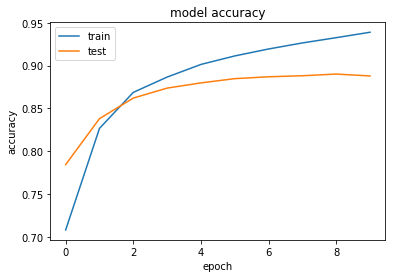

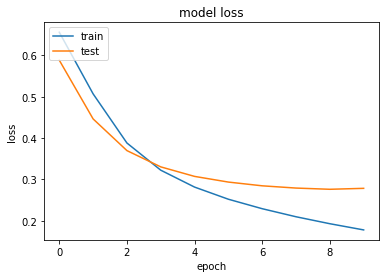

In [48]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## 8. evaluate = test

In [49]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 76us/sample - loss: 0.2910 - acc: 0.8802


[0.2910403439235687, 0.88016]

## 9. predict = inference

In [50]:
testID = 100
print(' '.join([idx2word[idx] for idx in x_test[testID]]))

out = model.predict(x_test[testID].reshape(1,256))
print(y_test[testID])
print(out)

<START> a quick glance at the premise of this film would seem to indicate just another dumb <UNK> <UNK> <UNK> slash fest the type where sex equals death and the actors are all annoying stereotypes you actually want to die however delivers considerably more br br rather than focus on bare flesh and gore though there is a little of each no sex however the flick focuses on delivering impending dread <UNK> tension amidst a lovely <UNK> backdrop these feelings are further <UNK> by a cast of realistically likable characters and <UNK> that are more amoral than cardboard <UNK> of evil oh yeah george kennedy is here too and when is that not a good thing br br if you liked wrong turn then watch this to see where much of its' <UNK> came from <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <